# Fourier Work
The following are exercises from Mark Newman's Computational Physics book.

In [120]:
import numba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [121]:
np.zeros(5//2 + 1, dtype='complex')

array([ 0.+0.j,  0.+0.j,  0.+0.j])

In [127]:
def py_dft(y):
    """ Discrete Fourier Transform for real-valued signals"""
    N = len(y)
    coefs = np.zeros(N//2 + 1, dtype=np.complex)
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        for n in range(N):
            coefs[k] += y[n]*np.exp(const*k*n)
    return coefs

@numba.njit
def dft(y):
    """ Discrete Fourier Transform for real-valued signals
        
        Parameters
        ----------
        y : Sequence[float]
            N evenly-spaced samples
        
        Returns
        -------
        List[complex]
            N//2 + 1 Fourier coefficients"""
    N = len(y)
    coefs = []
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        ck = 0
        for n in range(N):
            ck += y[n]*np.exp(const*k*n)
        coefs.append(ck)
    return coefs
        

<IPython.core.display.Javascript object>


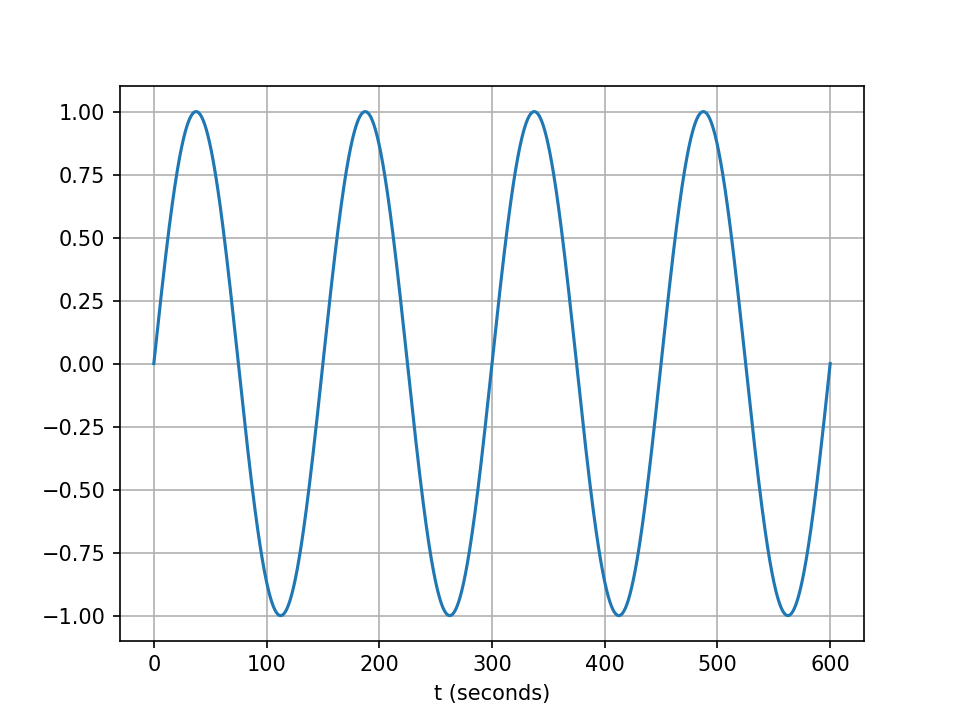

In [137]:
L = 4*150
T = 150
t = np.linspace(0, L, 10000)
y = np.sin(2*np.pi*t/T)
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

To convert to physical units: $x = \frac{n}{N}L$ and $k = \frac{k}{L}$

<IPython.core.display.Javascript object>


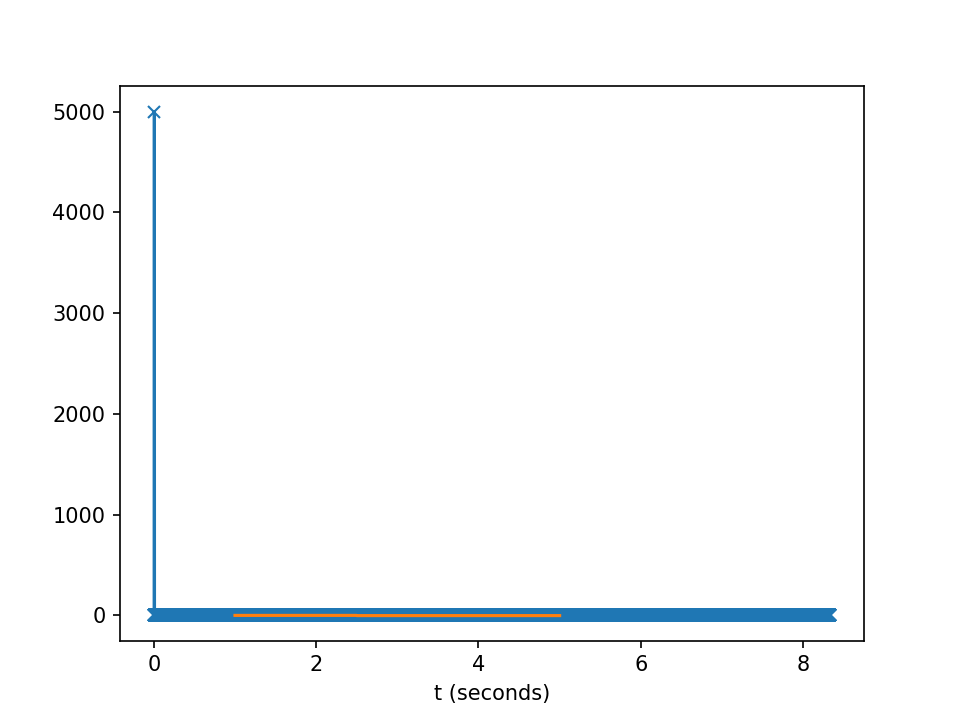

In [140]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
# ax.set_xlim(0,.02)
ax.grid()
ax.set_xlabel("k (Hz)")

Exercise 7.1

a) Single cycle of square-wave with amplitude 1

In [141]:
def square_filter(x):
    return 1 if x >= 0 else -1

<IPython.core.display.Javascript object>


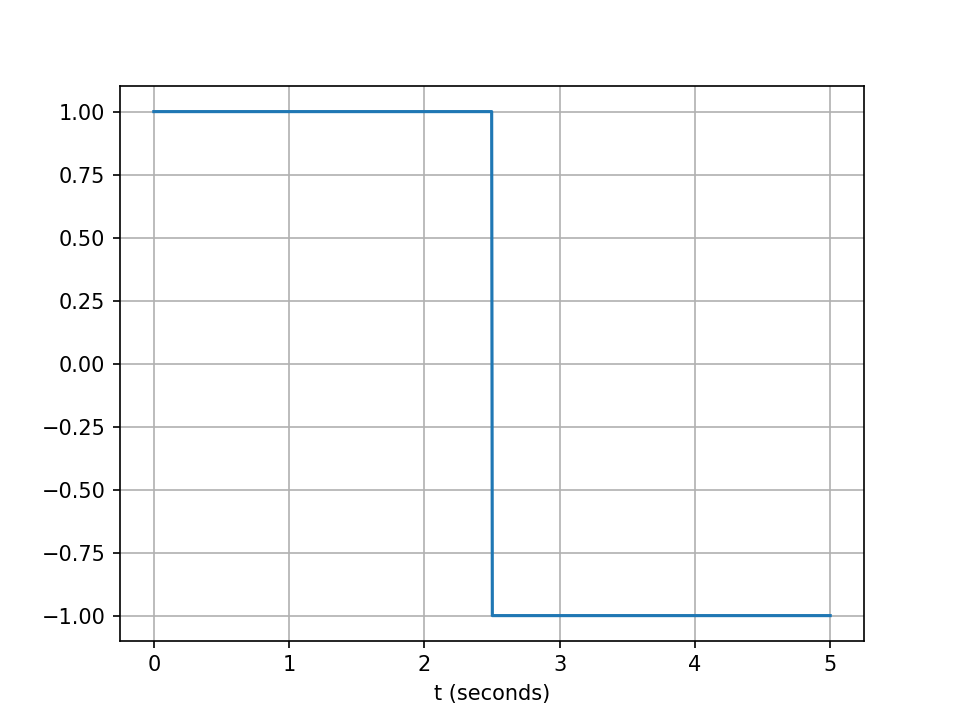

In [145]:
L = 5
t = np.linspace(0,L,1000)
y = [square_filter(i) for i in np.sin(2*np.pi*t/L)]
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

<IPython.core.display.Javascript object>


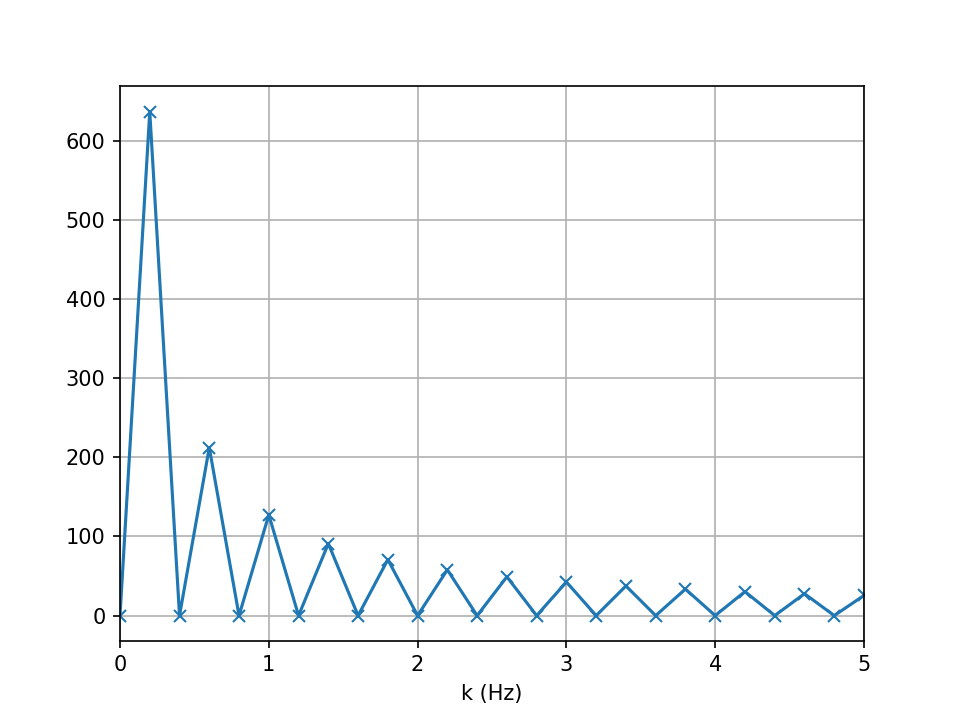

In [151]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0,5)
ax.grid()
ax.set_xlabel("k (Hz)")

b) Sawtooth wave: $y_{n} = n$

<IPython.core.display.Javascript object>


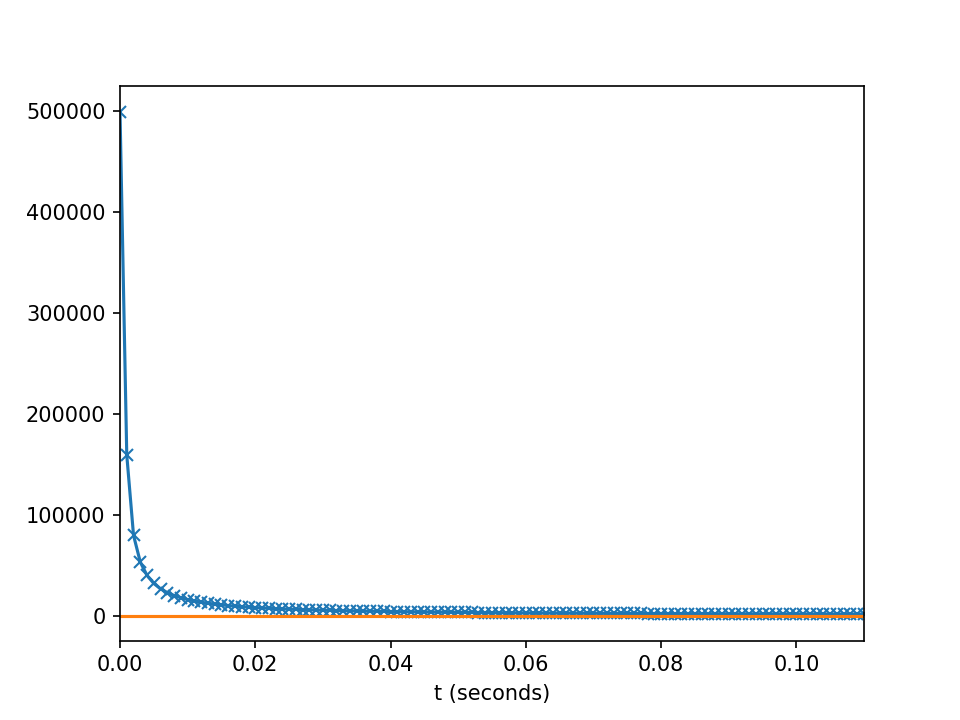

In [154]:
fig,ax = plt.subplots()
y = np.arange(1000)
L = 1000
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0,.11)
ax.grid()
ax.set_xlabel("k (Hz)")

b) modulated sine-wave

<IPython.core.display.Javascript object>


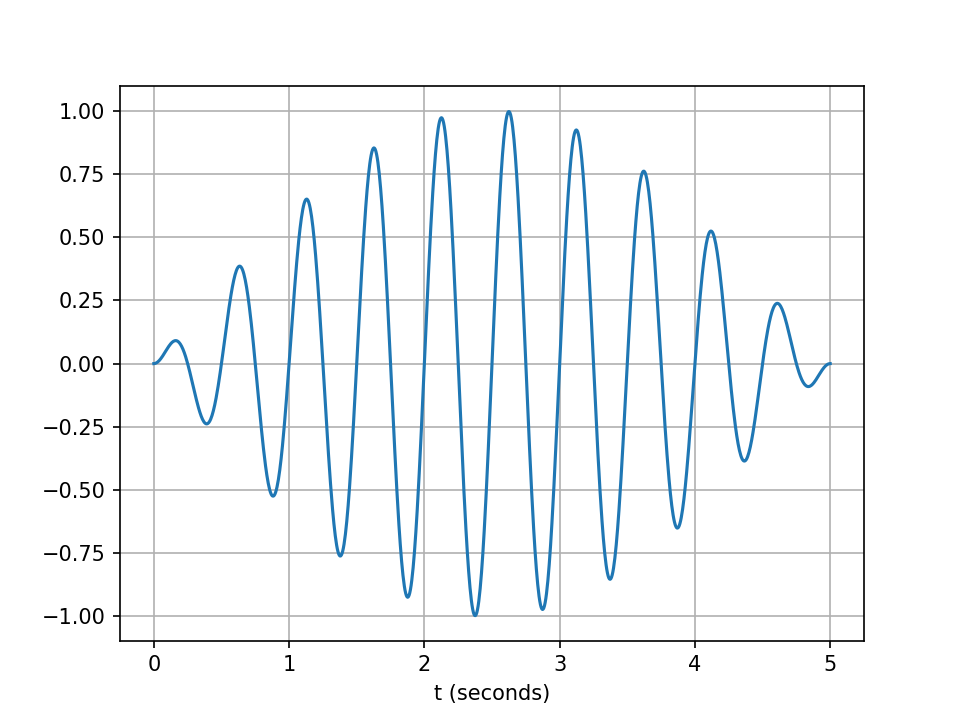

In [156]:
L = 5
t = np.linspace(0, L, 1000)
y = np.sin(np.pi*t/L) * np.sin(20*np.pi*t/L)
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

<IPython.core.display.Javascript object>


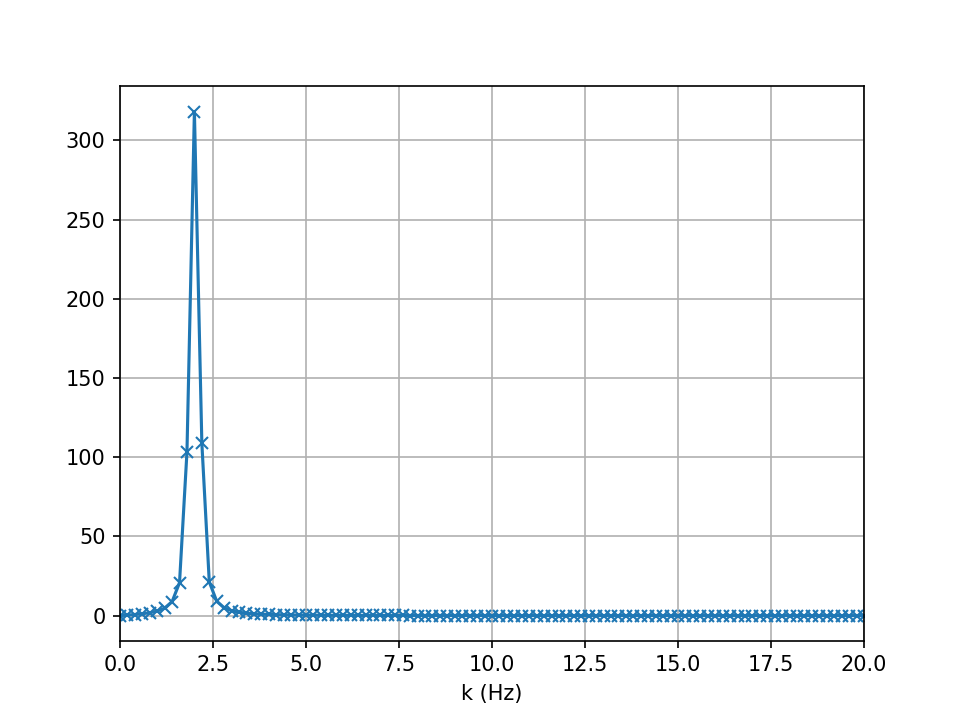

In [161]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0, 20)
ax.grid()
ax.set_xlabel("k (Hz)")

## Exercise 7.2

In [167]:
with open("sunspots.txt", "r") as F:
    data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])

<IPython.core.display.Javascript object>


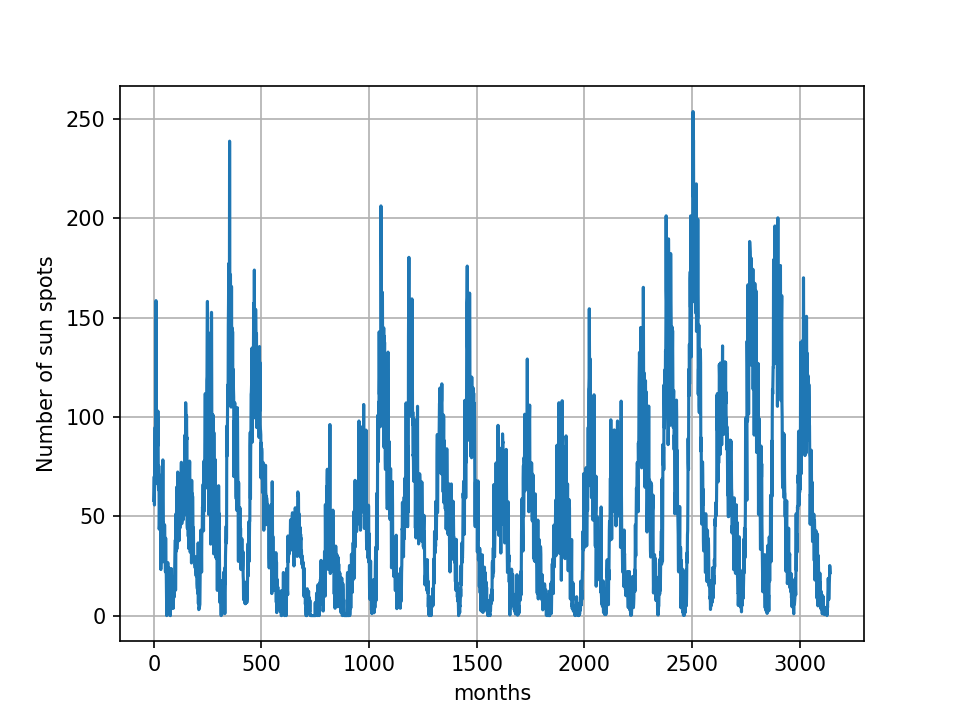

In [176]:
x = data[:, 0]
y = data[:, 1]
fig,ax = plt.subplots()
# ax.set_xlim(0,500)
ax.plot(x,y)
ax.grid()
ax.set_xlabel("months")
ax.set_ylabel("Number of sun spots")

<IPython.core.display.Javascript object>


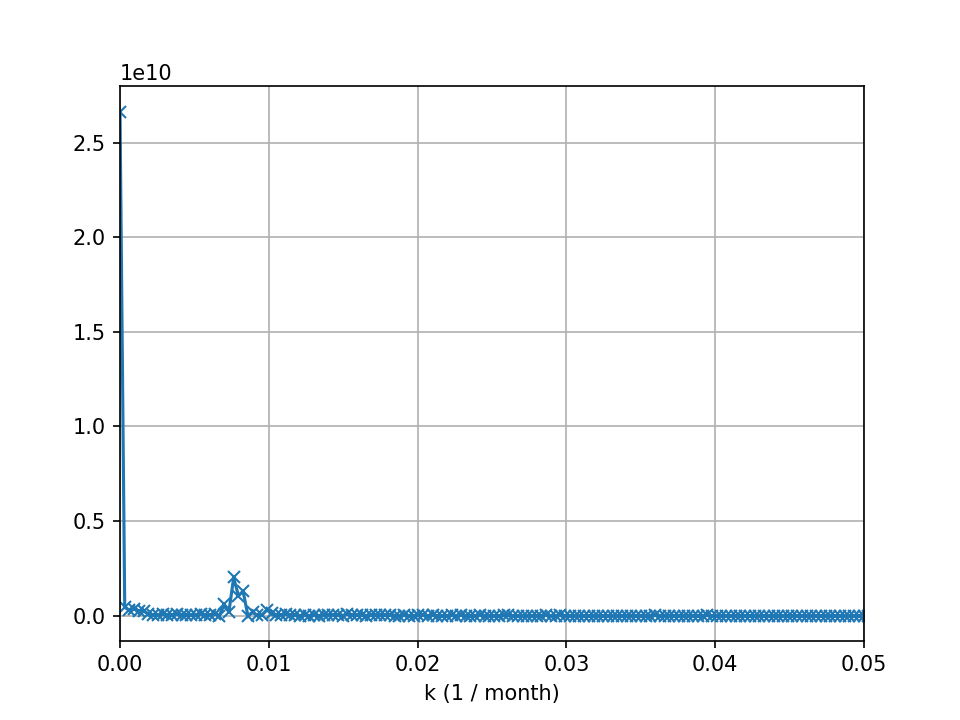

In [180]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
ax.plot(k, [np.abs(i)**2 for i in dft(y)], marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel("k (1 / month)")